### 1. Make classification data and get it ready 

In [2]:
import sklearn
from sklearn.datasets import make_circles 

In [3]:
n_samples = 1000 

X, y = make_circles(n_samples, noise=0.03, random_state=42)

print(X[:5])  # input_dim = 2
print(y[:5])  # output_dim = 1 -> binary classification -> output_layer activation => sigmoid 

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [4]:
import pandas as pd 
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y}) 

circles.head() 

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


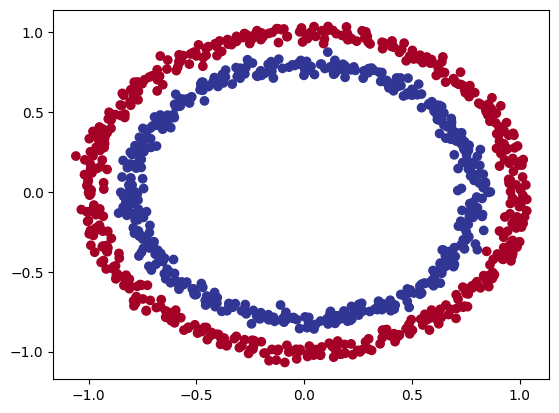

In [6]:
import matplotlib.pyplot as plt 

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu) 
plt.show() 

In [7]:
# check input and output shapes 
X.shape, y.shape 

((1000, 2), (1000,))

In [9]:
# view the first exmple of feuatres and labels 
X_sample = X[0] 
y_sample = y[0] 

X_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

In [10]:
# turn data into tensor and create train and test splits 
import torch 

X = torch.from_numpy(X).type(torch.float32) 
y = torch.from_numpy(y).type(torch.float32) 

X.dtype, y.dtype

(torch.float32, torch.float32)

In [11]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test) 

(800, 200, 800, 200)

In [13]:
from torch import nn 

device = "cuda" if torch.cuda.is_available() else "cpu" 
device 

'cpu'

In [15]:
class CircleModelV0(nn.Module): 
    def __init__(self): 
        super().__init__() 
        
        self.layer_1 = nn.Linear(in_features=2, out_features=5) 
        self.layer_2 = nn.Linear(in_features=5, out_features=1) 
        
    def forward(self, x): 
        return self.layer_2(self.layer_1(x)) 
    
model_0 = CircleModelV0().to(device) 
model_0  

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5), 
    nn.Linear(in_features=5, out_features=1) 
).to(device) 

model_1 

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
loss_fn = nn.BCEWithLogitsLoss()  # Sigmoid + Binary Cross Entropy 
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01) 

In [18]:
def accuracy(y_true, y_pred): 
    correct = torch.eq(y_true, y_pred).sum().item() 
    acc = (correct / len(y_pred)) * 100 
    return acc 

In [19]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

epochs = 100 

X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device) 

for epoch in range(epochs): 
    model_0.train() 
    
    # forward padd 
    y_logits = model_0(X_train).squeeze()  # NC -> C 
    y_preds = torch.round(torch.sigmoid(y_logits))  # logits -> probs -> labels 
    
    # calculate loss 
    loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss needs logits 
    
    acc = accuracy(y_train, y_preds)  
    
    # optimizer zero grad 
    optimizer.zero_grad() 
    
    # loss backward  
    loss.backward() 
    
    # optimizer step 
    optimizer.step() 
    
    # testing 
    model_0.eval() 
    with torch.inference_mode(): 
        # forward pass 
        test_logits = model_0(X_test).squeeze() 
        test_preds = torch.round(torch.sigmoid(test_logits)) 
        
        # calculate test loss 
        test_loss = loss_fn(test_logits, y_test) 
        
        test_acc = accuracy(y_test, test_preds) 
        
    # print out what's happening 
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")
    


Epoch: 0 | Loss: 0.69556 | Acc: 50.88 | Test Loss: 0.69947 | Test Acc: 48.50
Epoch: 10 | Loss: 0.69304 | Acc: 51.88 | Test Loss: 0.69365 | Test Acc: 47.50
Epoch: 20 | Loss: 0.69311 | Acc: 51.62 | Test Loss: 0.69438 | Test Acc: 48.00
Epoch: 30 | Loss: 0.69299 | Acc: 51.25 | Test Loss: 0.69506 | Test Acc: 47.50
Epoch: 40 | Loss: 0.69300 | Acc: 50.88 | Test Loss: 0.69470 | Test Acc: 46.50
Epoch: 50 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69459 | Test Acc: 47.50
Epoch: 60 | Loss: 0.69298 | Acc: 51.50 | Test Loss: 0.69469 | Test Acc: 45.50
Epoch: 70 | Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69469 | Test Acc: 46.50
Epoch: 80 | Loss: 0.69298 | Acc: 51.25 | Test Loss: 0.69468 | Test Acc: 45.50
Epoch: 90 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69467 | Test Acc: 46.00


In [20]:
import numpy as np 

def plot_decision_boundary(model, X, y):
    """
    Plots decision boundaries of model predicting on X in comparison to y.
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

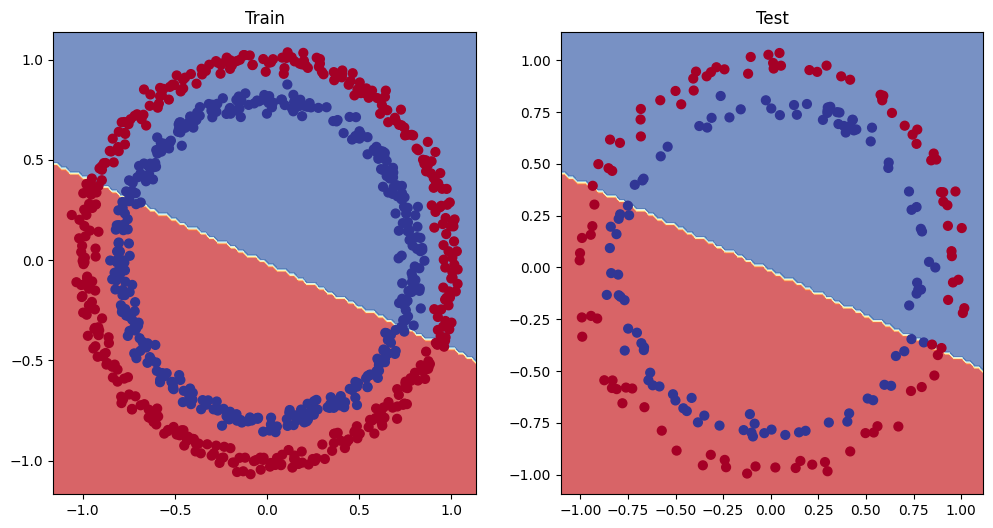

In [21]:
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1) 

plt.title("Train") 
plot_decision_boundary(model_0, X_train, y_train) 

plt.subplot(1, 2, 2) 
plt.title("Test") 
plot_decision_boundary(model_0, X_test, y_test) 

In [22]:
class CircleModelV1(nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.layer_1 = nn.Linear(in_features=2, out_features=10) 
        self.layer_2 = nn.Linear(in_features=10, out_features=10) 
        self.layer_3 = nn.Linear(in_features=10, out_features=1) 
        
    def forward(self, x): 
        return self.layer_3(self.layer_2(self.layer_1(x)))  
    
model_1 = CircleModelV1().to(device) 
model_1 

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
# param size 

for name, param in model_1.named_parameters(): 
    print(f"{name:10} {param.size()} {param.numel()}")  
# for param in model_1.parameters(): 
#     print(param.numel())

layer_1.weight torch.Size([10, 2]) 20
layer_1.bias torch.Size([10]) 10
layer_2.weight torch.Size([10, 10]) 100
layer_2.bias torch.Size([10]) 10
layer_3.weight torch.Size([1, 10]) 10
layer_3.bias torch.Size([1]) 1


In [46]:
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01) 

In [47]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42) 

epochs = 100 

X_train, y_train = X_train.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device) 

for epoch in range(epochs): 
    model_1.train() 
    
    # forward padd 
    y_logits = model_1(X_train).squeeze()   
    y_preds = torch.round(torch.sigmoid(y_logits))  
    
    # calculate loss 
    loss = loss_fn(y_logits, y_train) 
    
    acc = accuracy(y_train, y_preds)  
    
    # optimizer zero grad 
    optimizer.zero_grad() 
    
    # loss backward  
    loss.backward() 
    
    # optimizer step 
    optimizer.step() 
    
    # testing 
    model_1.eval() 
    with torch.inference_mode(): 
        # forward pass 
        test_logits = model_1(X_test).squeeze() 
        test_preds = torch.round(torch.sigmoid(test_logits)) 
        
        # calculate test loss 
        test_loss = loss_fn(test_logits, y_test) 
        
        test_acc = accuracy(y_test, test_preds) 
        
    # print out what's happening 
    if epoch % 10 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88 | Test Loss: 0.69430 | Test Acc: 50.00
Epoch: 10 | Loss: 0.69304 | Acc: 49.50 | Test Loss: 0.69429 | Test Acc: 46.50
Epoch: 20 | Loss: 0.69300 | Acc: 50.00 | Test Loss: 0.69499 | Test Acc: 45.50
Epoch: 30 | Loss: 0.69299 | Acc: 50.12 | Test Loss: 0.69456 | Test Acc: 46.50
Epoch: 40 | Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69470 | Test Acc: 45.00
Epoch: 50 | Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69468 | Test Acc: 45.00
Epoch: 60 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69468 | Test Acc: 45.50
Epoch: 70 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69467 | Test Acc: 46.00
Epoch: 80 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69469 | Test Acc: 45.50
Epoch: 90 | Loss: 0.69298 | Acc: 51.25 | Test Loss: 0.69467 | Test Acc: 45.50


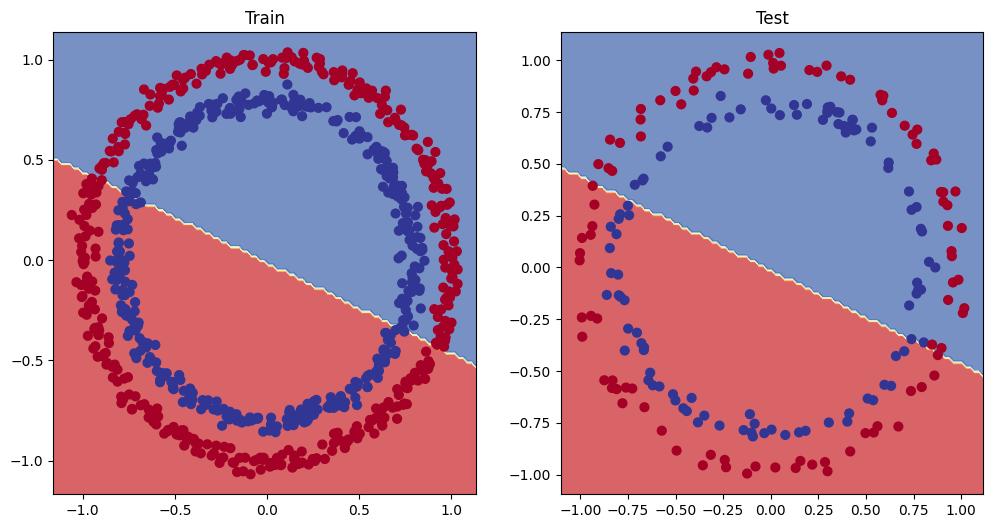

In [48]:
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1) 

plt.title("Train") 
plot_decision_boundary(model_1, X_train, y_train) 

plt.subplot(1, 2, 2) 
plt.title("Test") 
plot_decision_boundary(model_1, X_test, y_test) 

In [49]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [50]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


In [51]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    """
    Plots linear training data and test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

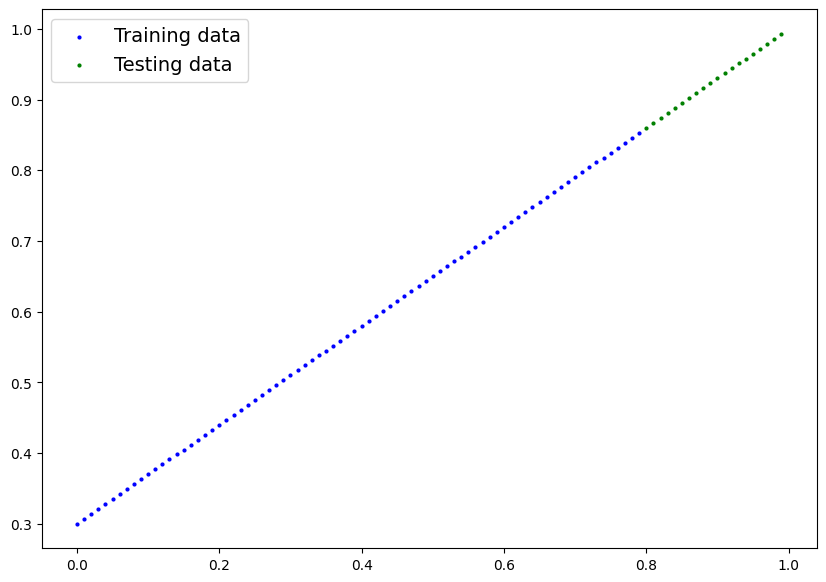

In [52]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [59]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10), 
    nn.Linear(in_features=10, out_features=10), 
    nn.Linear(in_features=10, out_features=1) 
).to(device) 

In [61]:
loss_fn = nn.L1Loss() 
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.01)

In [62]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000 

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device) 

for epoch in range(epochs): 
    model_2.train() 
    
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 
    
    model_2.eval() 
    with torch.inference_mode(): 
        test_loss = loss_fn(model_2(X_test_regression), y_test_regression)
        
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.77620
Epoch: 100 | Loss: 0.00335 | Test Loss: 0.00194
Epoch: 200 | Loss: 0.00458 | Test Loss: 0.01232
Epoch: 300 | Loss: 0.00196 | Test Loss: 0.01619
Epoch: 400 | Loss: 0.01017 | Test Loss: 0.02108
Epoch: 500 | Loss: 0.00803 | Test Loss: 0.01163
Epoch: 600 | Loss: 0.00724 | Test Loss: 0.00999
Epoch: 700 | Loss: 0.00667 | Test Loss: 0.00054
Epoch: 800 | Loss: 0.00190 | Test Loss: 0.00071
Epoch: 900 | Loss: 0.00392 | Test Loss: 0.02012


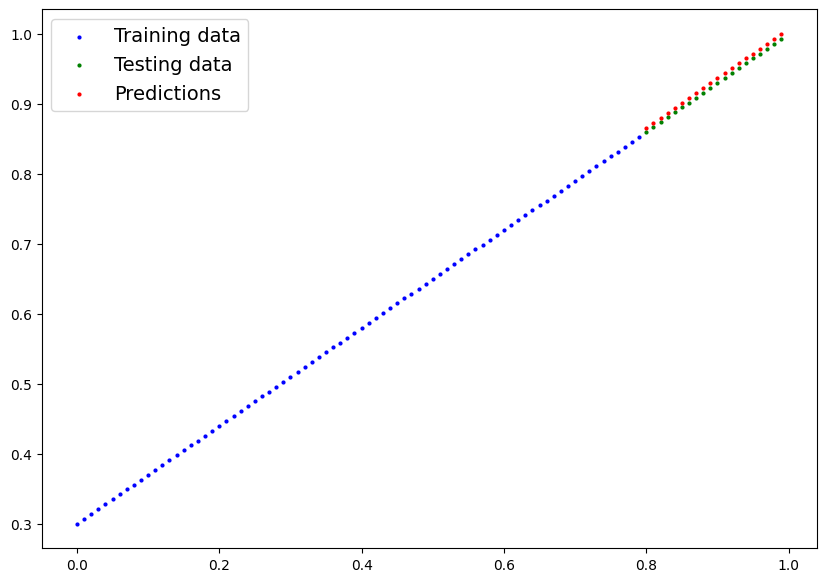

In [63]:
model_2.eval() 
with torch.inference_mode(): 
    y_preds = model_2(X_test_regression) 
    
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression, 
                 test_data=X_test_regression, 
                 test_labels=y_test_regression, 
                 predictions=y_preds) 